# Histogram of Oriented Gradients

HOG is en efficient method for reducing the dimensionality of images while still preserving enough variability to discern different classes.

For this example we will use the Dandelion dataset, which is comprised of 300 images of dandelion flowers and 300 images of background cases represented by grass, cement, soil, and gravel.

In [1]:
# Import modules
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output

from skimage.io import imread
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Read all image names

# Background tiles
background_filenames = glob.glob('background_tiles/*.png')
print(background_filenames[0])
print('Background tiles:', len(background_filenames), 'files')


# Dandelion tiles
dandelion_filenames = glob.glob('dandelion_tiles/*.png')
print(dandelion_filenames[0])
print('Dandelion tiles:', len(dandelion_filenames),'files')

# Merge filenames
filenames = dandelion_filenames + background_filenames

background_tiles/tile_background_349.png
Background tiles: 400 files
dandelion_tiles/tile_dandelion_329.png
Dandelion tiles: 400 files


In [ ]:
# Visualize the histogram of gradients
sample_image = imread(filenames[0])
fv, hog_image = hog(sample_image, visualize=True, multichannel=True,
                    orientations=8, 
                    pixels_per_cell=(16, 16),
                    cells_per_block=(4, 4))

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title('Input image')
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram of Oriented Gradients')
plt.imshow(hog_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
print('Features using the entire image:', sample_image.size)
print('Features using HOG:', fv.size)

In [4]:
n_samples = len(filenames)  # Total number of images
n_features = 128*128*3
X = np.full([n_samples, n_features], np.nan)
y = np.full([n_samples], '', dtype="U10") # Unicode string of 10 characters

for count,name in enumerate(filenames):
    
    # Read tile, flatten, and store in X
    tile = imread(name)
    X[count,:] = tile.flatten()

    # Find label and store label in y
    y[count] = name.split('_')[0] # Label is the first element
    
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.1)

# Train support vector machine
SVM_model = SVC() # Using a Radial Basis Function (default anyways in this version)
SVM_model.fit(X_train, y_train)
SVM_model.score(X_train, y_train)
SVM_predictions = SVM_model.predict(X_test)
SVM_score = SVM_model.score(X_test, y_test)
print(SVM_score)

# Logistic regression
LR_model = LogisticRegression(random_state=1,max_iter=3000)
LR_model.fit(X_train, y_train)
LR_model.score(X_train, y_train)
LR_predictions = LR_model.predict(X_test)
LR_score = LR_model.score(X_test, y_test)
print(LR_score)

1.0
1.0


In [ ]:
for i in range(len(y_test)):
    #print('Truth:', y_test[i], 'LR:',LR_predictions[i], 'SVM:',SVM_predictions[i])

In [7]:
img = imread('full_images/IMG_6979.JPG')

w = 128
h = 128
delta = round(h/2)
label_boxes = np.empty((0,4))
row_range = np.arange(0, img.shape[0], delta)
col_range = np.arange(0, img.shape[1], delta)

for row in row_range[:-1]:
    for col in col_range[:-1]:
        if (row+h>img.shape[0]) | (col+w>img.shape[1]):
              continue
        else:
            tile = img[row:row+h, col:col+w, :]
            fv = tile.flatten()
            fv = np.reshape(fv, (1,-1))

            label = LR_model.predict(fv)
            box = np.array([col,row,w,h])
             
            if label == 'dandelion':
                label_boxes = np.vstack( (label_boxes, box) )
                #plt.gca().add_patch(mpatches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor='r',facecolor='none'))

            #clear_output(wait=True)
            #plt.imshow(tile)
            #plt.title(label)
            #plt.show()
            #plt.pause(0.5)
            
        

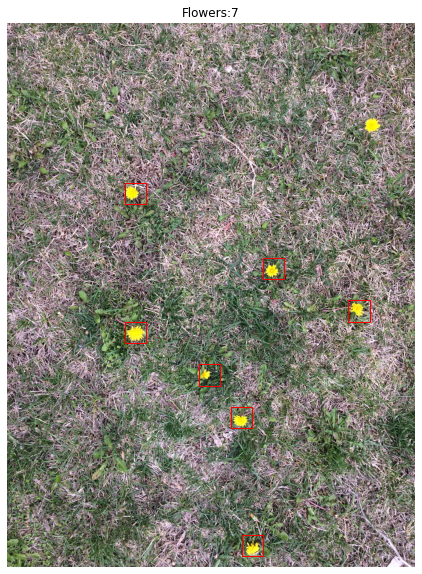

In [8]:
# Display image with classified Dandelions
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Flowers:' + str(len(label_boxes)) )
plt.axis('off')
for box in label_boxes:
    plt.gca().add_patch(mpatches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor='r',facecolor='none'))

plt.show()